In [80]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap
import math
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Text(0.5, 1.0, 'New Inputs')

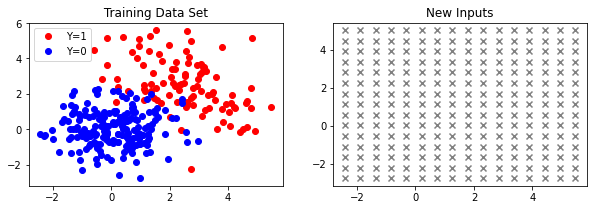

In [81]:
#Groupe 1
N1=100
p1=np.array([2.5,2.5])
m1=[[2, -0.8],[-0.8,2]] 
y1=np.random.multivariate_normal(p1,m1,N1)

#Groupe 2
N2=200
p2=np.zeros(2)
m2=np.eye(2)
y2=np.random.multivariate_normal(p2,m2,N2)


#Graphique
figure = plt.figure(figsize=(10,3))
ax = plt.subplot(1,2,1)
plt.plot(y1[:,0],y1[:,1],'o', label='Y=1', color='red')
plt.plot(y2[:,0],y2[:,1],'o',color='blue',label='Y=0')
plt.legend()
plt.title(' Training Data Set ')


#Notation
x1_min=min( min(y1[:,0]),min(y2[:,0]) )
x1_max=max( max(y1[:,0]),max(y2[:,0]) ) 
x2_min=min( min(y1[:,1]),min(y2[:,1]) )
x2_max=max( max(y1[:,1]),max(y2[:,1]) )
#print(x1_min,x1_max,y1_min,y1_max)  

Neval=15
h1=(x1_max-x1_min)/Neval
h2=(x2_max-x2_min)/Neval
x1Eval, x2Eval=np.meshgrid(np.arange(x1_min, x1_max, h1), np.arange(x2_min, x2_max, h2)) 

ax=plt.subplot(1,2,2)
ax.scatter(x1Eval,x2Eval,c='gray',marker='x')
ax.set_title('New Inputs')

In [82]:
#The labeled data
#N=200
#xgauss=[rd.gauss(0,1) for i in range (N)]
#ygauss=[rd.gauss(0,1) for i in range (N)]
#figure = plt.figure(figsize=(10,3))
#ax = plt.subplot(1,2,1)
#plt.plot(xgauss, ygauss, 'o', color='blue')
#plt.title('Training Data Set (TDS)')
#xmin,xmax=min(xgauss),max(xgauss)
#ymin,ymax=min(ygauss),max(ygauss)
#Neval=15
#h1=(xmax-xmin)/Neval
#h2=(ymax-ymin)/Neval
#x1Eval, x2Eval=np.meshgrid(np.arange(xmin, xmax, h1), np.arange(ymin, ymax, h2))
#ax=plt.subplot(1,2,2)
#ax.scatter(x1Eval,x2Eval,c='gray',marker='x')
#ax.set_title('New Inputs')

In [83]:
#Mettre mes données training dans un tableau
X=np.concatenate((y1,y2))
#Label des données
Y=np.zeros([N1+N2,1])
Y[0:N1]=1
#Utilisation de=u modèle decision tree
tree=DecisionTreeClassifier()
treefit=tree.fit(X, Y)
pY_train=treefit.predict_proba(X)

#Score and decision  on the training set (Why Score? je ne vois que la décision de l'arbre)
predxclass=np.argmax(pY_train,axis=1)
predxclass=predxclass.reshape(300,1)
#print(predxclass)
#Accuracy
E_train=(Y!=predxclass).sum() / len(Y)
print("Error on the complete training set %5.2f->",E_train)


Error on the complete training set %5.2f-> 0.0


In [84]:
#Model description
from sklearn.tree import export_text
r=export_text(treefit)
print(r)


|--- feature_1 <= 1.09
|   |--- feature_0 <= 2.67
|   |   |--- feature_0 <= 1.97
|   |   |   |--- class: 0.0
|   |   |--- feature_0 >  1.97
|   |   |   |--- feature_0 <= 2.05
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_0 >  2.05
|   |   |   |   |--- feature_1 <= -0.08
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_1 >  -0.08
|   |   |   |   |   |--- feature_1 <= 0.30
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_1 >  0.30
|   |   |   |   |   |   |--- class: 0.0
|   |--- feature_0 >  2.67
|   |   |--- feature_0 <= 3.04
|   |   |   |--- feature_0 <= 2.85
|   |   |   |   |--- class: 1.0
|   |   |   |--- feature_0 >  2.85
|   |   |   |   |--- class: 0.0
|   |   |--- feature_0 >  3.04
|   |   |   |--- class: 1.0
|--- feature_1 >  1.09
|   |--- feature_0 <= 0.87
|   |   |--- feature_1 <= 2.33
|   |   |   |--- feature_0 <= 0.12
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_0 >  0.12
|   |   |   |   |--- feature_0 <= 0.20
|  

Score and decision bounderie

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 

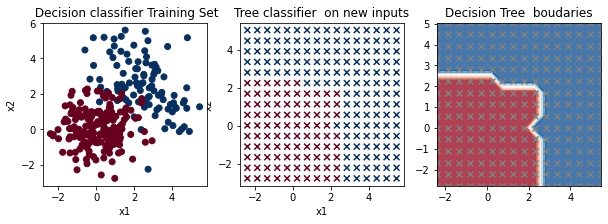

In [85]:
figure = plt.figure(figsize=(10,3))
ax = plt.subplot(1,3,2)
X1=np.ravel(x1Eval)
Y1=np.ravel(x2Eval)
XX=np.zeros([240,2])
#Y1.shape
#XX.shape
XX[:,0]=X1
XX[:,1]=Y1
predXXclass=treefit.predict(XX)
print(predXXclass)
cm = plt.cm.RdBu
ax.scatter(X1,Y1,c=predXXclass,marker='x',cmap=cm)
ax.set_title('Tree classifier  on new inputs')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
Z=np.ravel(predxclass) 
ax = plt.subplot(1,3,1)
ax.scatter(X[:,0],X[:,1],c=Z,cmap=cm)
ax.set_title(' Decision classifier Training Set')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
#Bounderies
ax = plt.subplot(1,3,3)
ax.set_title('Decision Tree  boudaries')
predXXclass=predXXclass.reshape(x1Eval.shape)
print(predXXclass)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, predXXclass, cmap=cm, alpha=.8)
ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

In [86]:
#Meta parameters of the decision tree

In [87]:
DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=10)

DecisionTreeClassifier(min_samples_leaf=10, min_samples_split=20)

In [88]:
#Mettre mes données training dans un tableau
X=np.concatenate((y1,y2))
#Label des données
Y=np.zeros([N1+N2,1])
Y[0:N1]=1
#Utilisation de=u modèle decision tree
tree=DecisionTreeClassifier(min_samples_split=20, min_samples_leaf=10)
treefit=tree.fit(X, Y)
pY_train=treefit.predict_proba(X)

#Score and decision  on the training set (Why Score? je ne vois que la décision de l'arbre)
predxclass=np.argmax(pY_train,axis=1)
predxclass=predxclass.reshape(300,1)
#print(predxclass)
#Accuracy
E_train=(Y!=predxclass).sum() / len(Y)
print("Error on the complete training set %5.2f->",E_train)

Error on the complete training set %5.2f-> 0.04


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 

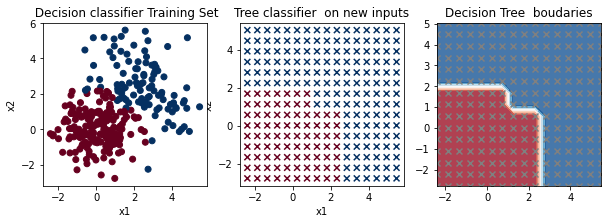

In [89]:
figure = plt.figure(figsize=(10,3))
ax = plt.subplot(1,3,2)
X1=np.ravel(x1Eval)
Y1=np.ravel(x2Eval)
XX=np.zeros([240,2])
#Y1.shape
#XX.shape
XX[:,0]=X1
XX[:,1]=Y1
predXXclass=treefit.predict(XX)
print(predXXclass)
cm = plt.cm.RdBu
ax.scatter(X1,Y1,c=predXXclass,marker='x',cmap=cm)
ax.set_title('Tree classifier  on new inputs')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
Z=np.ravel(predxclass) 
ax = plt.subplot(1,3,1)
ax.scatter(X[:,0],X[:,1],c=Z,cmap=cm)
ax.set_title(' Decision classifier Training Set')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
#Bounderies
ax = plt.subplot(1,3,3)
ax.set_title('Decision Tree  boudaries')
predXXclass=predXXclass.reshape(x1Eval.shape)
print(predXXclass)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, predXXclass, cmap=cm, alpha=.8)
ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

In [90]:
#Bagging
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import BaggingClassifier
treemod=tree.DecisionTreeClassifier()
bagmod=BaggingClassifier(base_estimator=treemod, n_estimators=10, random_state=0)
treemodfit=treemod.fit(X, Y);
bagmodfit=bagmod.fit(X, Y);
pY_train=bagmodfit.predict_proba(X);#Score and decision  on the training set
predxclass=np.argmax(pY_train,axis=1);
print(predxclass)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


/Users/shurongzhang/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 

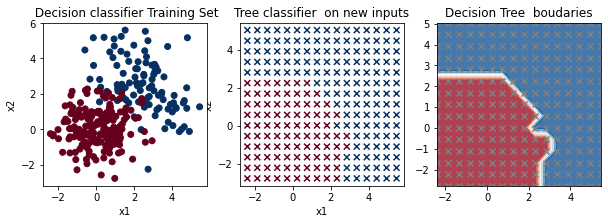

In [91]:
figure = plt.figure(figsize=(10,3))
ax = plt.subplot(1,3,2)
X1=np.ravel(x1Eval)
Y1=np.ravel(x2Eval)
XX=np.zeros([240,2])
#Y1.shape
#XX.shape
XX[:,0]=X1
XX[:,1]=Y1
predXXclass=bagmod.predict(XX)
print(predXXclass)
cm = plt.cm.RdBu
ax.scatter(X1,Y1,c=predXXclass,marker='x',cmap=cm)
ax.set_title('Tree classifier  on new inputs')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
Z=np.ravel(predxclass) 
ax = plt.subplot(1,3,1)
ax.scatter(X[:,0],X[:,1],c=Z,cmap=cm)
ax.set_title(' Decision classifier Training Set')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
#Bounderies
ax = plt.subplot(1,3,3)
ax.set_title('Decision Tree  boudaries')
predXXclass=predXXclass.reshape(x1Eval.shape)
print(predXXclass)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, predXXclass, cmap=cm, alpha=.8)
ax.scatter(x1Eval,x2Eval,c='gray',marker='x')

In [92]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

RF=RandomForestClassifier(max_depth=2, random_state=0)
RFfit=RF.fit(X, np.ravel(Y))
FY_train = RFfit.predict_proba(X)
#Score and decision computation on the training set
Fpredxclass=np.argmax(FY_train,axis=1)
#print(Fpredxclass)
#Accuracy
FE_train=(Y!=Fpredxclass.reshape(300,1)).sum() / len(Y)
print("Error on the complete training set %5.2f->",FE_train)

Error on the complete training set %5.2f-> 0.02666666666666667


[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


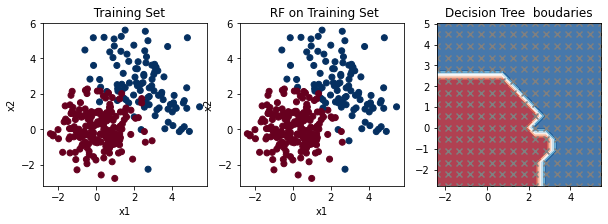

In [94]:
#Représentation schématique des modèles
figure = plt.figure(figsize=(10,3))
ax = plt.subplot(1,3,1)
ax.scatter(X[:,0],X[:,1],c=np.ravel(Y),cmap=cm)
ax.set_title('  Training Set')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax = plt.subplot(1,3,2)
ax.scatter(X[:,0],X[:,1],c=Fpredxclass,cmap=cm)
ax.set_title(' RF on Training Set')
ax.set_xlabel('x1')
ax.set_ylabel('x2') 

#Bounderies
ax = plt.subplot(1,3,3)
ax.set_title('Decision Tree  boudaries')
predXXclass=predXXclass.reshape(x1Eval.shape)
print(predXXclass)
cm = plt.cm.RdBu
ax.contourf(x1Eval, x2Eval, predXXclass, cmap=cm, alpha=.8)
ax.scatter(x1Eval,x2Eval,c='gray',marker='x')


In [99]:
import pandas as pd
import numpy as np
tab=pd.read_csv('SAheart.txt')
#print(tab)
np.shape(tab)

(462, 11)

In [101]:
Y=tab["chd"]
Xnum=tab.loc[:,['sbp','tobacco','ldl','adiposity','typea','obesity','alcohol','age']]
X=Xnum.to_numpy();
X

array([[1.600e+02, 1.200e+01, 5.730e+00, ..., 2.530e+01, 9.720e+01,
        5.200e+01],
       [1.440e+02, 1.000e-02, 4.410e+00, ..., 2.887e+01, 2.060e+00,
        6.300e+01],
       [1.180e+02, 8.000e-02, 3.480e+00, ..., 2.914e+01, 3.810e+00,
        4.600e+01],
       ...,
       [1.080e+02, 3.000e+00, 1.590e+00, ..., 2.009e+01, 2.664e+01,
        5.500e+01],
       [1.180e+02, 5.400e+00, 1.161e+01, ..., 2.735e+01, 2.397e+01,
        4.000e+01],
       [1.320e+02, 0.000e+00, 4.820e+00, ..., 1.470e+01, 0.000e+00,
        4.600e+01]])